# 07 - Tree Hyperparameters

In [1]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:33: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))


       age  education  years_exp  compensation  python  r  sql  Q1_Male  \
587     25       18.0        4.0             0       1  0    1        1   
3065    22       16.0        1.0         10000       1  0    0        1   
8435    22       18.0        1.0             0       1  0    0        1   
3110    40       20.0        3.0        125000       1  0    1        0   
16372   45       12.0        5.0        100000       1  0    1        1   
...    ...        ...        ...           ...     ... ..  ...      ...   
16608   25       16.0        2.0         10000       0  0    1        1   
7325    18       16.0        1.0         30000       1  0    1        1   
21810   18       16.0        2.0             0       0  0    0        1   
4917    25       18.0        1.0        100000       1  0    1        1   
639     25       18.0        1.0         10000       1  0    0        0   

       Q1_Female  Q1_Prefer not to say  Q1_Prefer to self-describe  \
587            0             

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df_.Q4.replace({'Master’s degree': 18,
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:79: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  python=df_.Q16_Part_1.fillna(0).replace('Python', 1),
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:80: FutureWarning: Downcasting behavior in `r

In [2]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing
import xgboost as xgb
import dtreeviz
#also, must install graphviz for plotting to work with xgb

In [3]:
stump_dt = tree.DecisionTreeClassifier(max_depth=1) #this is the scikit-learn tree
X_train = kag_pl.fit_transform(kag_X_train)
stump_dt.fit(X_train, kag_y_train)

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:79: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

DecisionTreeClassifier(max_depth=1)

In [5]:
stump_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## Tracking Changes with Validation Curves

- We will measure how OOS error varies with tree depth

Text(0.5, 0, 'max_depth')

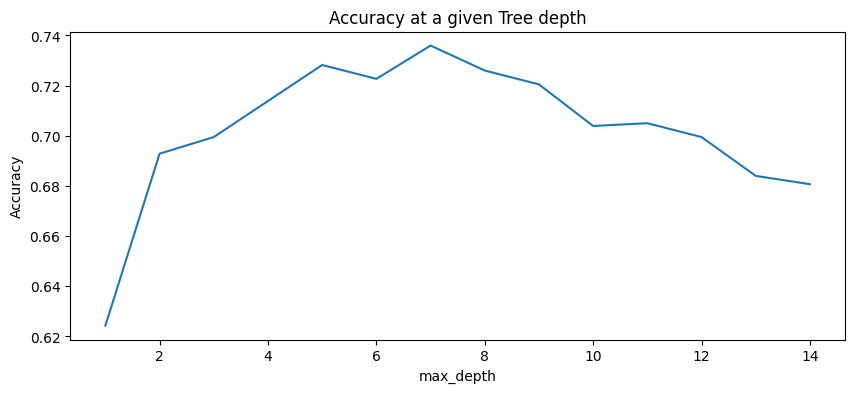

In [6]:
accuracies = []
for depth in range(1, 15):
    between = tree.DecisionTreeClassifier(max_depth=depth)
    between.fit(X_train, kag_y_train)
    accuracies.append(between.score(X_test, kag_y_test))
fig, ax = plt.subplots(figsize=(10,4))
(pd.Series(accuracies, name='Accuracy',index=range(1, len(accuracies)+1))
 .plot(ax=ax, title='Accuracy at a given Tree depth'))
ax.set_ylabel('Accuracy')
ax.set_xlabel('max_depth')